In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mpg_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

df_mpg = pd.read_csv(mpg_data_url, header=None, sep='\s+',names=['mpg', 'cylinders', 'displacement', 
                                                                 'horsepower', 'weight', 'acceleration', 'model year',
                                                                 'origin', 'car name'])

In [3]:
# Replace '?' with NaN
df_mpg_nan = df_mpg.replace('?', np.NaN)

In [4]:
# Forward fill NaN values
df_mpg_no_nan = df_mpg_nan.fillna(method='ffill')

In [5]:
# Convert horsepower data from object to float
df_mpg_no_nan['horsepower'] = df_mpg_no_nan['horsepower'].astype(float)
df_mpg_no_nan.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
# Use one hot encoding to convert categorical data to boolean
df_mpg_cleaned = pd.get_dummies(df_mpg_no_nan, columns=['car name'])

In [7]:
df_mpg_cleaned.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name_amc ambassador brougham,car name_amc ambassador dpl,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Assignment 113: Plots

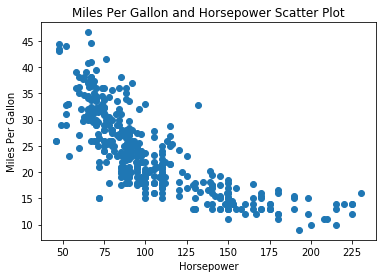

In [8]:
plt.scatter(df_mpg_cleaned['horsepower'], df_mpg_cleaned['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')
plt.title('Miles Per Gallon and Horsepower Scatter Plot')
plt.show()

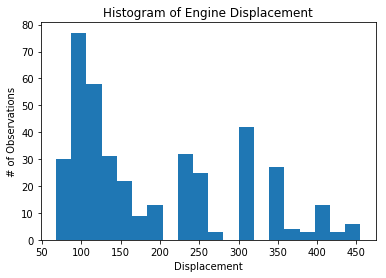

In [9]:
plt.hist(df_mpg_cleaned['displacement'], bins=20)
plt.xlabel('Displacement')
plt.ylabel('# of Observations')
plt.title('Histogram of Engine Displacement')
plt.show()

Text(0.5, 1.0, 'Bar Chart of Model Year')

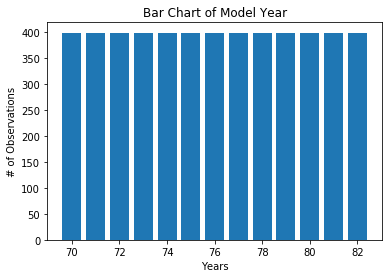

In [10]:
# 1st attempt
plt.bar(df_mpg_cleaned['model year'], df_mpg_cleaned['model year'].count())
# 2nd attempt
# years = range(1970, 1983)
# plt.bar(years, df_mpg_cleaned['model year'])
plt.xlabel('Years')
plt.ylabel('# of Observations')
plt.title('Bar Chart of Model Year')

In [11]:
df_mpg_cleaned['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

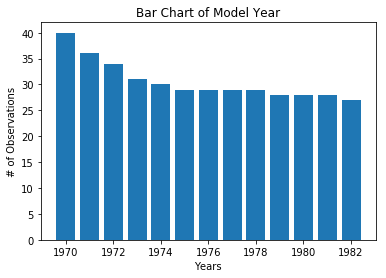

In [12]:
# 2nd attempt
years = np.arange(1970, 1983)
plt.bar(years, df_mpg_cleaned['model year'].value_counts())
plt.xlabel('Years')
plt.ylabel('# of Observations')
plt.title('Bar Chart of Model Year')
plt.show()

In [13]:
df_mpg_cleaned['model year'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: model year, dtype: int64

In [14]:
# 3nd attempt
years = df_mpg_cleaned['model year'].unique()
height = {years: df_mpg_cleaned['model year'].value_counts()}
plt.bar(years, height)
plt.xlabel('Years')
plt.ylabel('# of Observations')
plt.title('Bar Chart of Model Year')
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
# 4th attempt
years = df_mpg_cleaned['model year'].unique()
height = df_mpg_cleaned.nunique()
plt.bar(years, height)
plt.xlabel('Years')
plt.ylabel('# of Observations')
plt.title('Bar Chart of Model Year')
plt.show()

In [ ]:
# 5th attempt
years = df_mpg_cleaned['model year'].unique()
height = df_mpg_cleaned.nunique()
year_height_dict = {years: height}
plt.bar(year_height_dict)
plt.xlabel('Years')
plt.ylabel('# of Observations')
plt.title('Bar Chart of Model Year')
plt.show()

In [ ]:
# 6th attempt
df_mpg_cleaned['model year'].plot.bar();

In [ ]:
# 7th attempt
model_year_counts = {}
for year in df_mpg_cleaned['model year']:
    if year not in model_year_counts:
        model_year_counts[year] = 1
    else:
        model_year_counts[year] += 1
        
print(model_year_counts)

In [ ]:
year_counts = pd.Series(model_year_counts)
print(year_counts)

In [ ]:
year_counts.plot.bar()
plt.title('Bar Graph of Model Year')
plt.xlabel('Model Year')
plt.ylabel('# of Occurrances')
plt.show()

In [ ]:
df_mpg_cleaned['model year'].value_counts()

In [ ]:
df_mpg_all_numeric = df_mpg_cleaned[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                                    'acceleration', 'model year', 'origin']]
df_mpg_all_numeric.head()

In [ ]:
df_mpg_all_numeric.hist(bins=20)

In [ ]:
from bokeh.charts import Scatter

## Low on time, will work on bokeh chart later after checking out a tutorial